ML Guided Project 
---

By: Bilal Ahmed

In [101]:
#importing necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Read the data
df = pd.read_csv("Admission_Predict.csv")

Overview of Data

In [103]:
df.head()#checking first 5 rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [104]:
df.shape

(400, 9)

There are 400 rows and 9 columns

In [105]:
# examining the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


From the above function, we got to know that there are no missing values.

In [106]:
#checking the unique elements in each attribute
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

Removing "Serial No." column as it is not needed for our analysis

In [107]:
# drop the serial column
df.drop(["Serial No."], axis=1, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


Checking for duplicated rows

In [108]:
#chekc for duplicates
df.duplicated().sum()

0

Checking some columns to see whether they are categorical or numerical

In [109]:
df["SOP"].value_counts()

4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64

SOP having less than 10 unique values in number --- categorical

In [110]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [111]:
df["LOR "].value_counts() #less than 10 -- categorical

3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR , dtype: int64

In [112]:
df["Research"].value_counts()

1    219
0    181
Name: Research, dtype: int64

In [113]:
df.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Outliers Detection

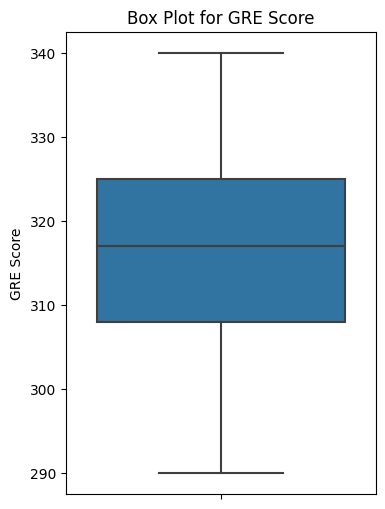

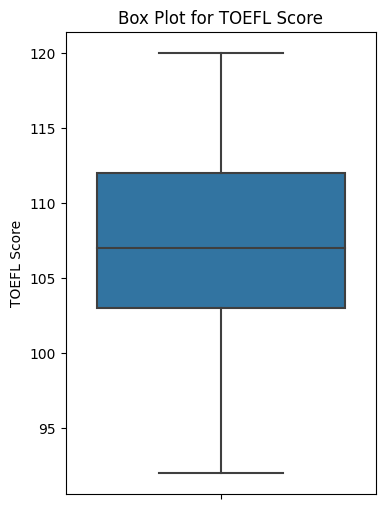

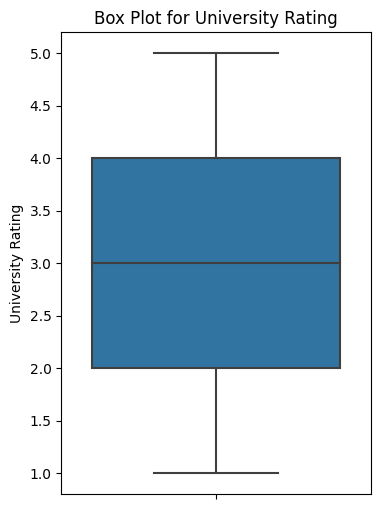

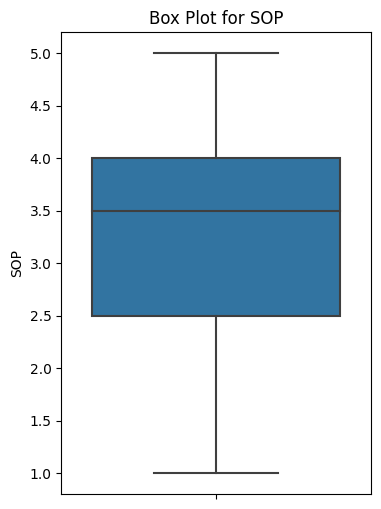

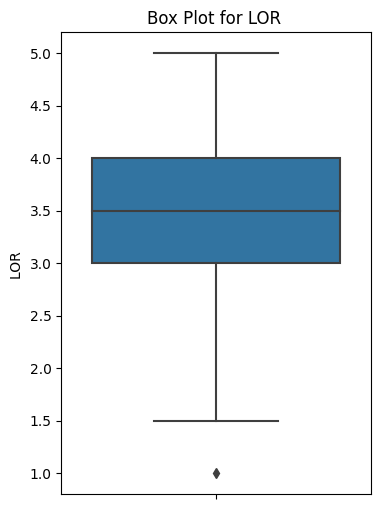

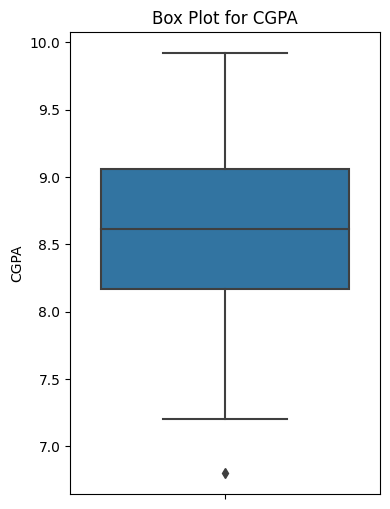

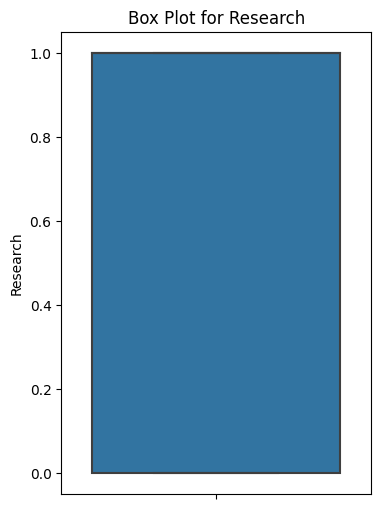

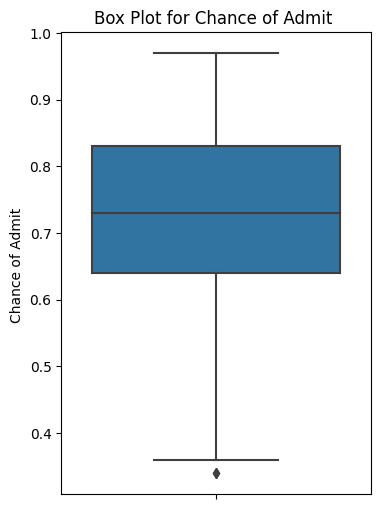

In [114]:
for col in df.columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

All the outliers are being retained as values that we got from .describe function tells us that these outliers are logical. 

Further investigating outliers

In [115]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [116]:
#check the row with 1 lor
df[df["LOR "] == 1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


In [117]:
#check row with less than 7 cgpa
df[df["CGPA"] < 7]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.8,1,0.36


In [118]:
# SOp and LOR are cate or cont
#sop 1-5
#lor 1-5
df["SOP"].unique()
#min -1
#max-5

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [119]:
df["SOP"].value_counts()

4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64

In [120]:
df["LOR "].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [121]:
print(df["CGPA"].value_counts())


8.00    9
8.76    8
8.56    7
9.11    6
8.64    6
       ..
9.32    1
9.48    1
9.56    1
7.28    1
7.96    1
Name: CGPA, Length: 168, dtype: int64


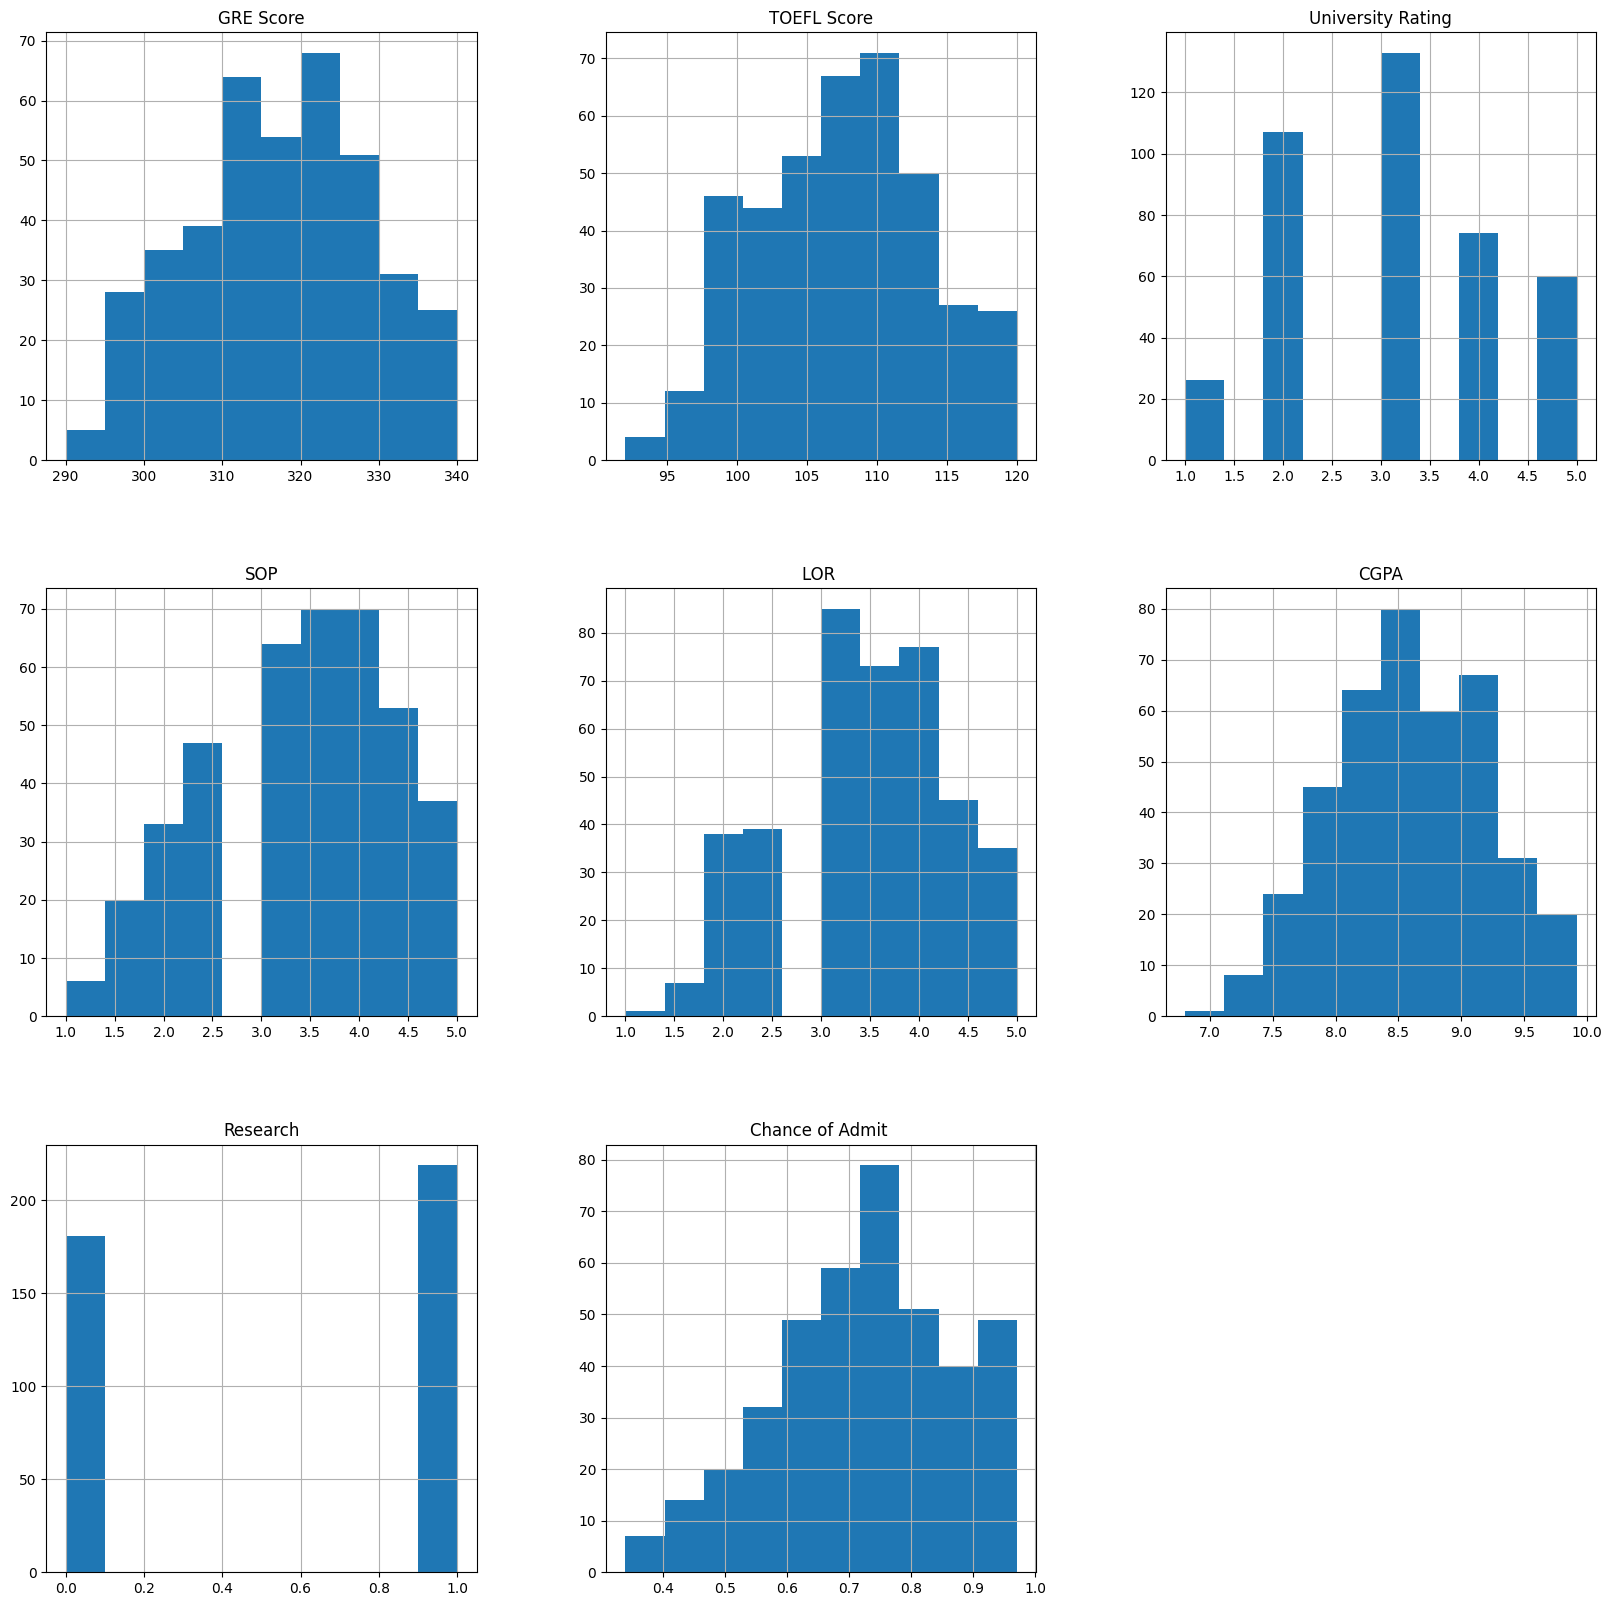

In [122]:
# distribution of numerical variable
df.hist(figsize=(20,20))
plt.show()

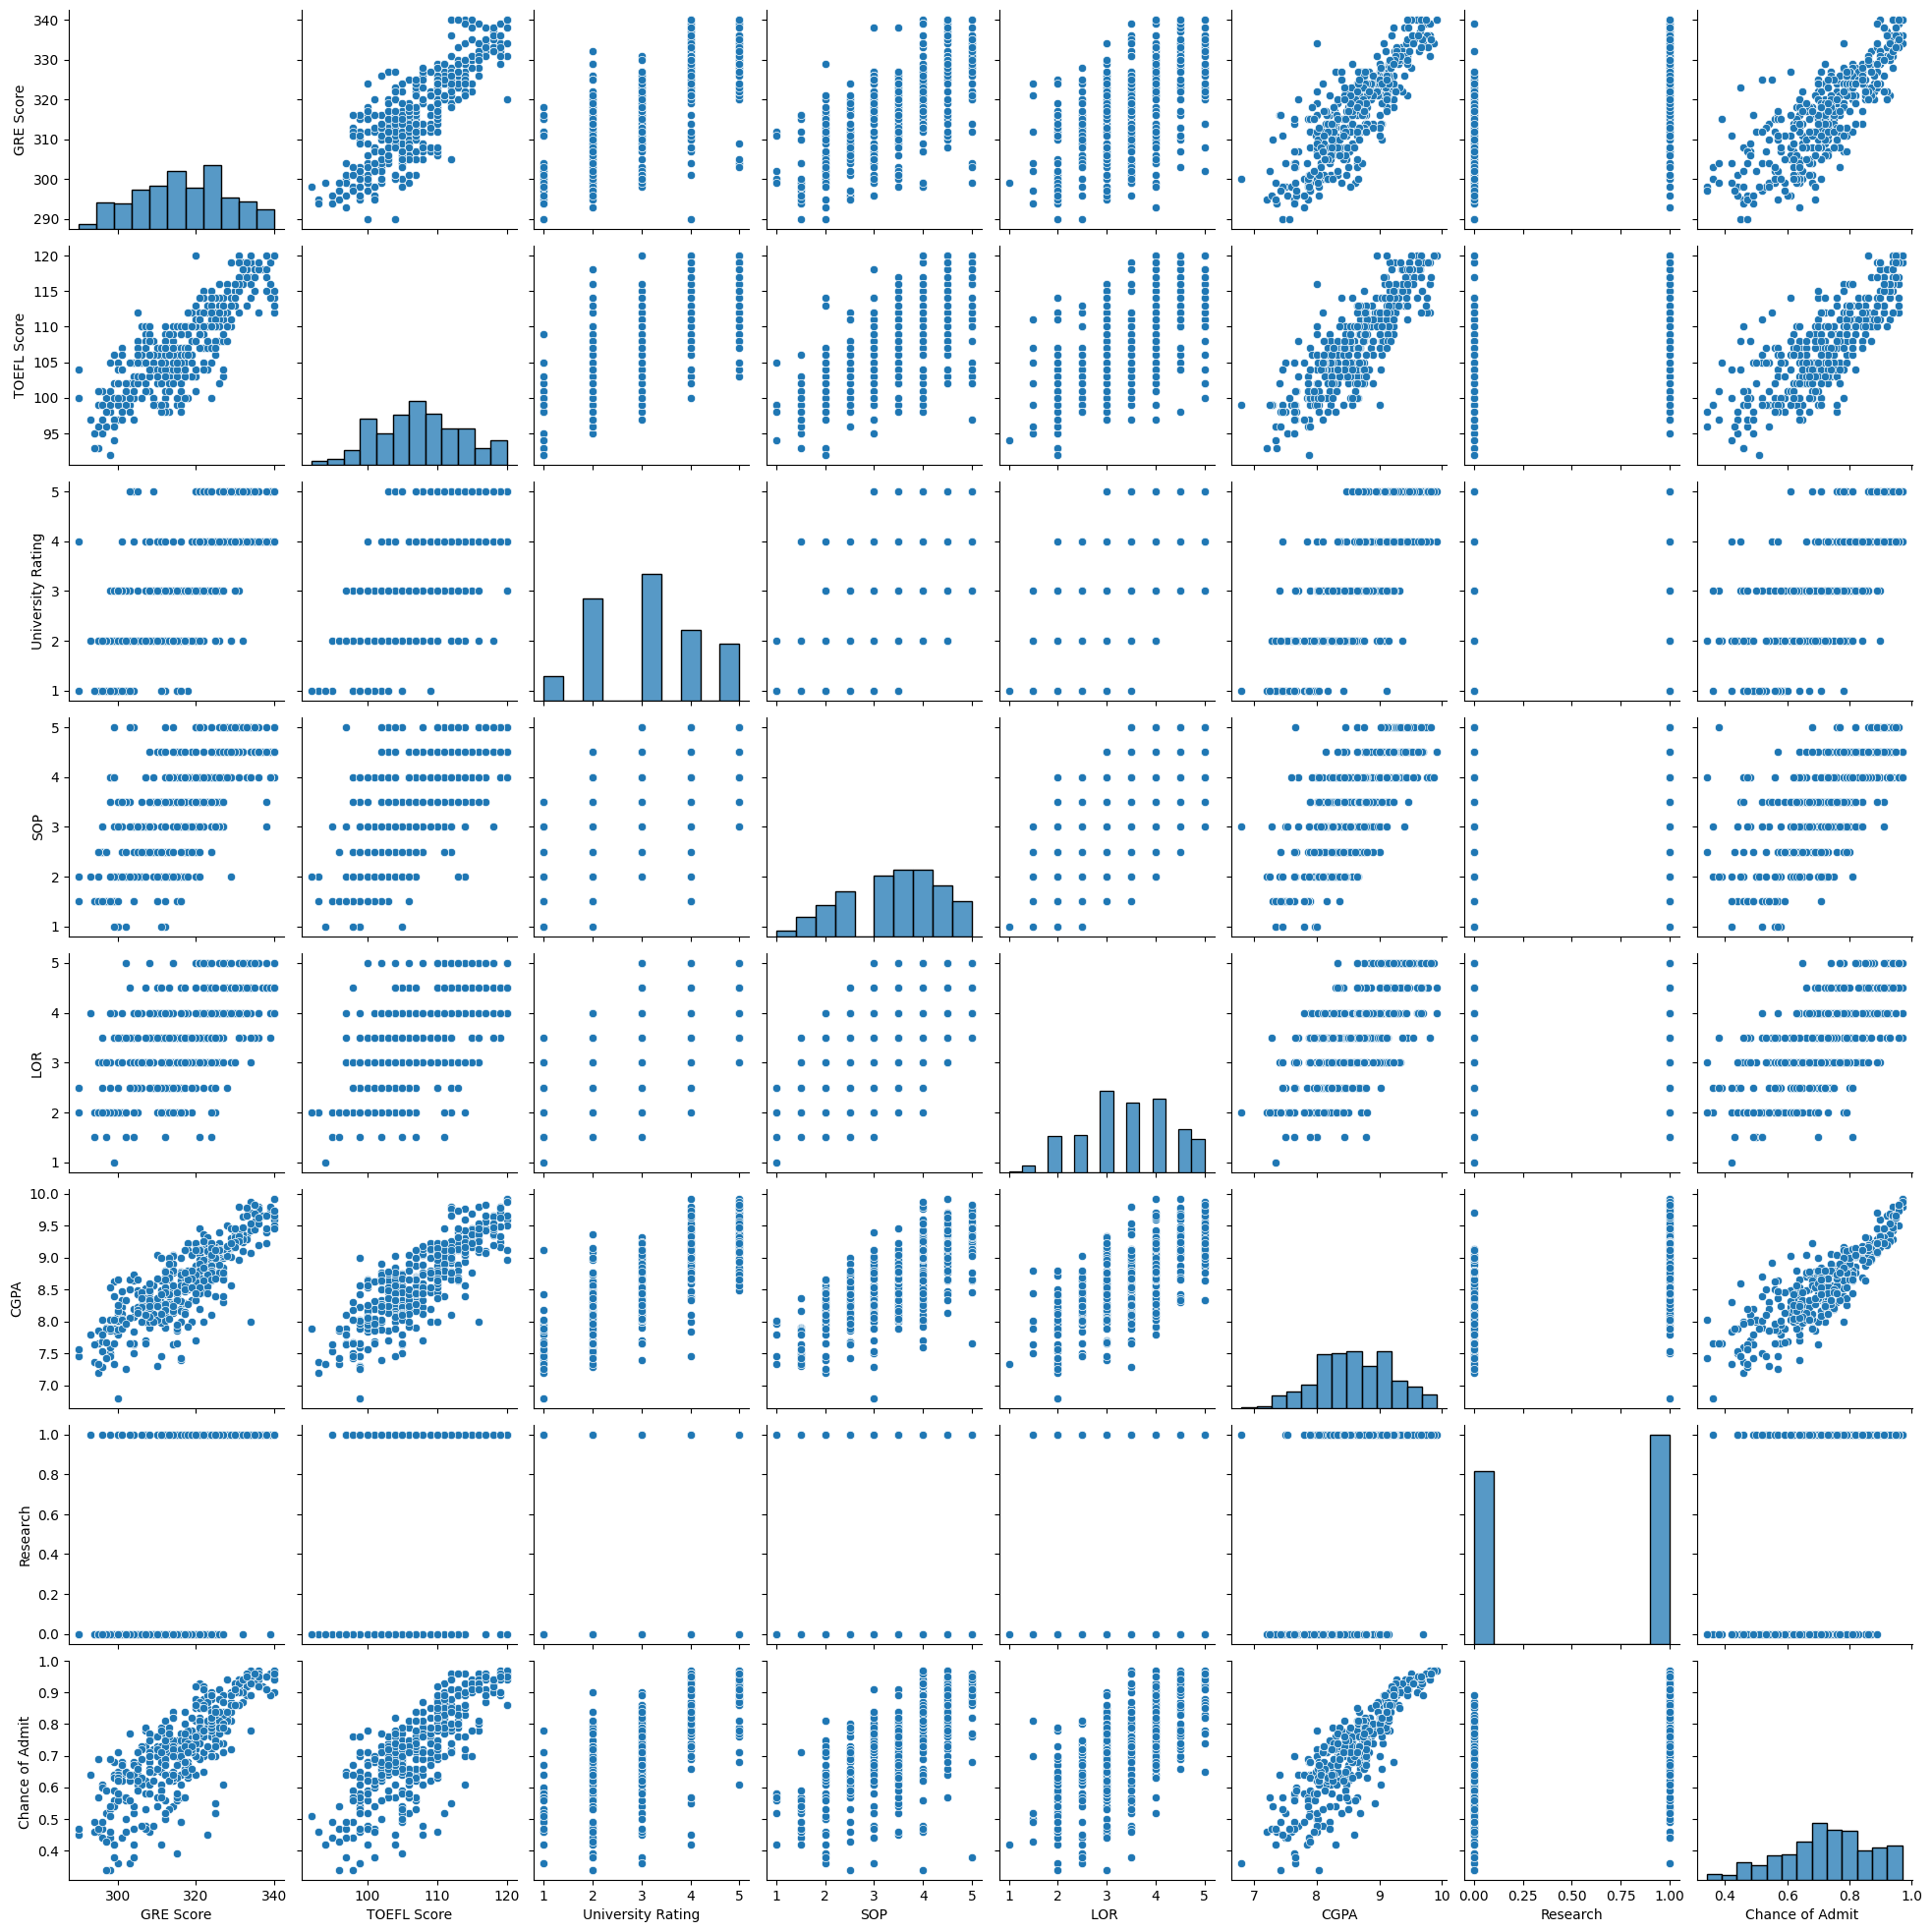

In [123]:
# linearity with chances of admission
sns.pairplot(df)
plt.show()

Tofel, gre, cgpa are highly linear with output( chances of admissions) just by looking at the visualizations above

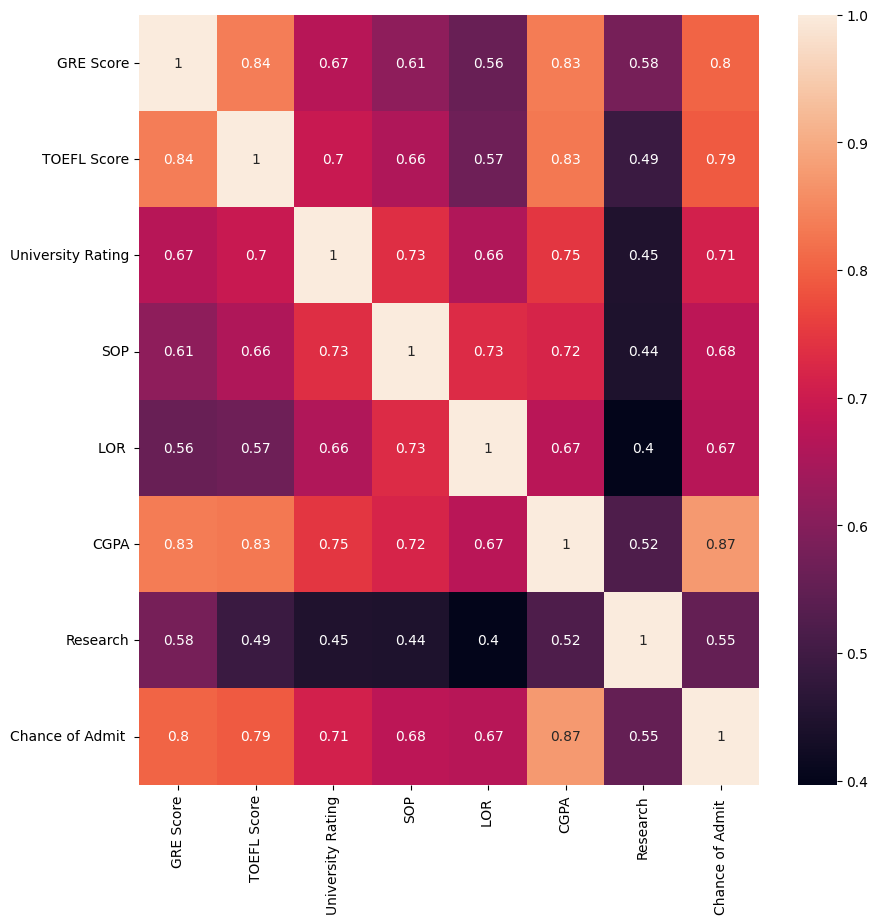

In [124]:
#heat map of the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

CGPA, GRE and TOFL are highly corelated with chances of admission

many columns highlhy multicolinear! Toefel, gre and cgpa --- a trigger that multilinear regression won't be a good model choice.

Please note we are only discussing numeric continuous columns. Pearsen correlation matrix works for numeric columns only.

Continuous columns we discussed are: Toefel, gre, cgpa, chance of admission



In [125]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Evaluation Table

In [127]:
Evaluation_Results = pd.DataFrame(np.zeros((3,5)), columns=['R2 Test', 'R2 Adjusted', 'MAE', 'MSE', 'RMSE'])
Evaluation_Results.index=['Multilinear Regression (MR)','Decision Tree (DT)', 'Random Forest (RF)']

In [128]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [129]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

In [130]:
print("\nSplitting dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splitting dataset into training and test sets...


In [131]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0


In [132]:
y_train.head()

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
Name: Chance of Admit , dtype: float64

In [133]:
print("Scaling features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling features using StandardScaler...


In [134]:
print("Training Linear Regression model on scaled features...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)

Training Linear Regression model on scaled features...


LinearRegression()

In [135]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [136]:
model.intercept_

0.7252812500000001

The model coefficient tells us while all variables are held constant with no effect on chances of admission; the model has predicted that with every application there is 0.72 units increased chance of getting an admission.

In [137]:
model.coef_

array([ 0.02099652,  0.01639522,  0.00844812, -0.00029857,  0.01413835,
        0.0673812 ,  0.01108222])

From the coefficients of the multilinear regression model, we can infer that with a 1 unit increase in GRE score, the chances of admission will increase by 0.02 units holding all other variables constant. So, a score of 10 GRE points, according to model prediction, will simply means 10*0.02 = 0.2 units increased chance of getting admission. 

Similarly, with every 1 unit increase in GRE score, the model has predicted that the chances of admission will increase by 0.06 units. So a score of 0.1 CGPA means 0.006 decreased chances of admission.

In [138]:
#a = 10
#b = 0.02
#print(a*b)


a = 0.1
b = 0.06
print(a*b)

0.006


In [139]:
print("Predicting on test data...")
y_pred = model.predict(X_test_scaled)

Predicting on test data...


In [152]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

Evaluation_Results.iloc[0]['R2 Test']= r2 
Evaluation_Results.iloc[0]['R2 Adjusted']= adjusted_r2 
Evaluation_Results.iloc[0]['MAE']= mae 
Evaluation_Results.iloc[0]['MSE']= mse
Evaluation_Results.iloc[0]['RMSE']= rmse


✅ R² Score: 0.8212
✅ Adjusted R² Score: 0.8038
📉 Mean Squared Error (MSE): 0.0046
📉 Mean Absolute Error (MAE): 0.0480
📉 Root Mean Squared Error (RMSE): 0.0679


In [153]:
Evaluation_Results


,R2 Test,R2 Adjusted,MAE,MSE,RMSE
Multilinear Regression (MR),0.821208,0.803826,0.047957,0.004617,0.067949
Decision Tree (DT),0.821208,0.803826,0.047957,0.004617,0.067949
Random Forest (RF),0.000000,0.000000,0.000000,0.000000,0.000000


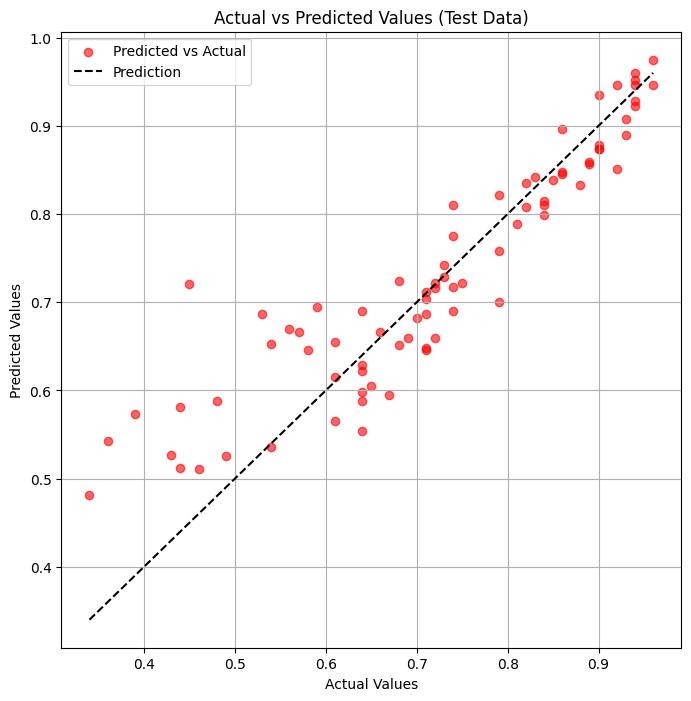

In [154]:
# visualizing the true values and prediction values
plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, color='red', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Prediction')

plt.title("Actual vs Predicted Values (Test Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [155]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [156]:
#Train decision tree
dt_regressor = DecisionTreeRegressor(random_state = 10, max_depth=25,)
dt_regressor.fit(X_train_scaled, y_train)


DecisionTreeRegressor(max_depth=25, random_state=10)

In [157]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [158]:
model.intercept_

0.7252812500000001

The model coefficient tells us while all variables are held constant with no effect on chances of admission; the model has predicted that with every application there is 0.72 units increased chance of getting an admission.

In [159]:
model.coef_

array([ 0.02099652,  0.01639522,  0.00844812, -0.00029857,  0.01413835,
        0.0673812 ,  0.01108222])

In [163]:
print("Predicting on train data...")
y_pred_training = model.predict(X_train_scaled)

Predicting on train data...


In [ ]:
print("Predicting on test data...")
y_pred = model.predict(X_test_scaled)

Predicting on test data...


In [165]:
# Evaluation metrics
r2_train = r2_score(y_train, y_pred_training)
print(f"✅ R² Score Train: {r2_train:.4f}")
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score Test: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

Evaluation_Results.iloc[1]['R2 Test']= r2 
Evaluation_Results.iloc[1]['R2 Adjusted']= adjusted_r2 
Evaluation_Results.iloc[1]['MAE']= mae 
Evaluation_Results.iloc[1]['MSE']= mse
Evaluation_Results.iloc[1]['RMSE']= rmse

✅ R² Score Train: 0.7952
✅ R² Score Test: 0.8212
✅ Adjusted R² Score: 0.8038
📉 Mean Squared Error (MSE): 0.0046
📉 Mean Absolute Error (MAE): 0.0480
📉 Root Mean Squared Error (RMSE): 0.0679


In [162]:
Evaluation_Results

,R2 Test,R2 Adjusted,MAE,MSE,RMSE
Multilinear Regression (MR),0.821208,0.803826,0.047957,0.004617,0.067949
Decision Tree (DT),0.821208,0.803826,0.047957,0.004617,0.067949
Random Forest (RF),0.000000,0.000000,0.000000,0.000000,0.000000


In [166]:
#using grid searchCV to get best parameters for decision tree regressor


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(dt_regressor, cv=5, param_grid=param)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=10,
                      splitter='random')
Best Score (R2): 0.6795784710301082
Test Score (R2): 0.73306629474888


Using Dt regressor again with hypertuning now

In [167]:
#Train decision tree
dt_regressor_tuned = DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=10,
                      splitter='random')
dt_regressor_tuned.fit(X_train_scaled, y_train)


DecisionTreeRegressor(criterion='absolute_error', max_depth=5, random_state=10,
                      splitter='random')

In [168]:
print("Predicting on train data...")
y_pred_training = model.predict(X_train_scaled)

Predicting on train data...


In [169]:
print("Predicting on test data...")
y_pred = model.predict(X_test_scaled)

Predicting on test data...


In [170]:
# Evaluation metrics
r2_train = r2_score(y_train, y_pred_training)
print(f"✅ R² Score Train: {r2_train:.4f}")
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score Test: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")



✅ R² Score Train: 0.7952
✅ R² Score Test: 0.8212
✅ Adjusted R² Score: 0.8038
📉 Mean Squared Error (MSE): 0.0046
📉 Mean Absolute Error (MAE): 0.0480
📉 Root Mean Squared Error (RMSE): 0.0679


We see there is no difference in values after tuning it too

In [ ]:
#Evaluation_Results.iloc[1]['R2 Test']= r2 
#Evaluation_Results.iloc[1]['R2 Adjusted']= adjusted_r2 
#Evaluation_Results.iloc[1]['MAE']= mae 
#Evaluation_Results.iloc[1]['MSE']= mse
#Evaluation_Results.iloc[1]['RMSE']= rmse

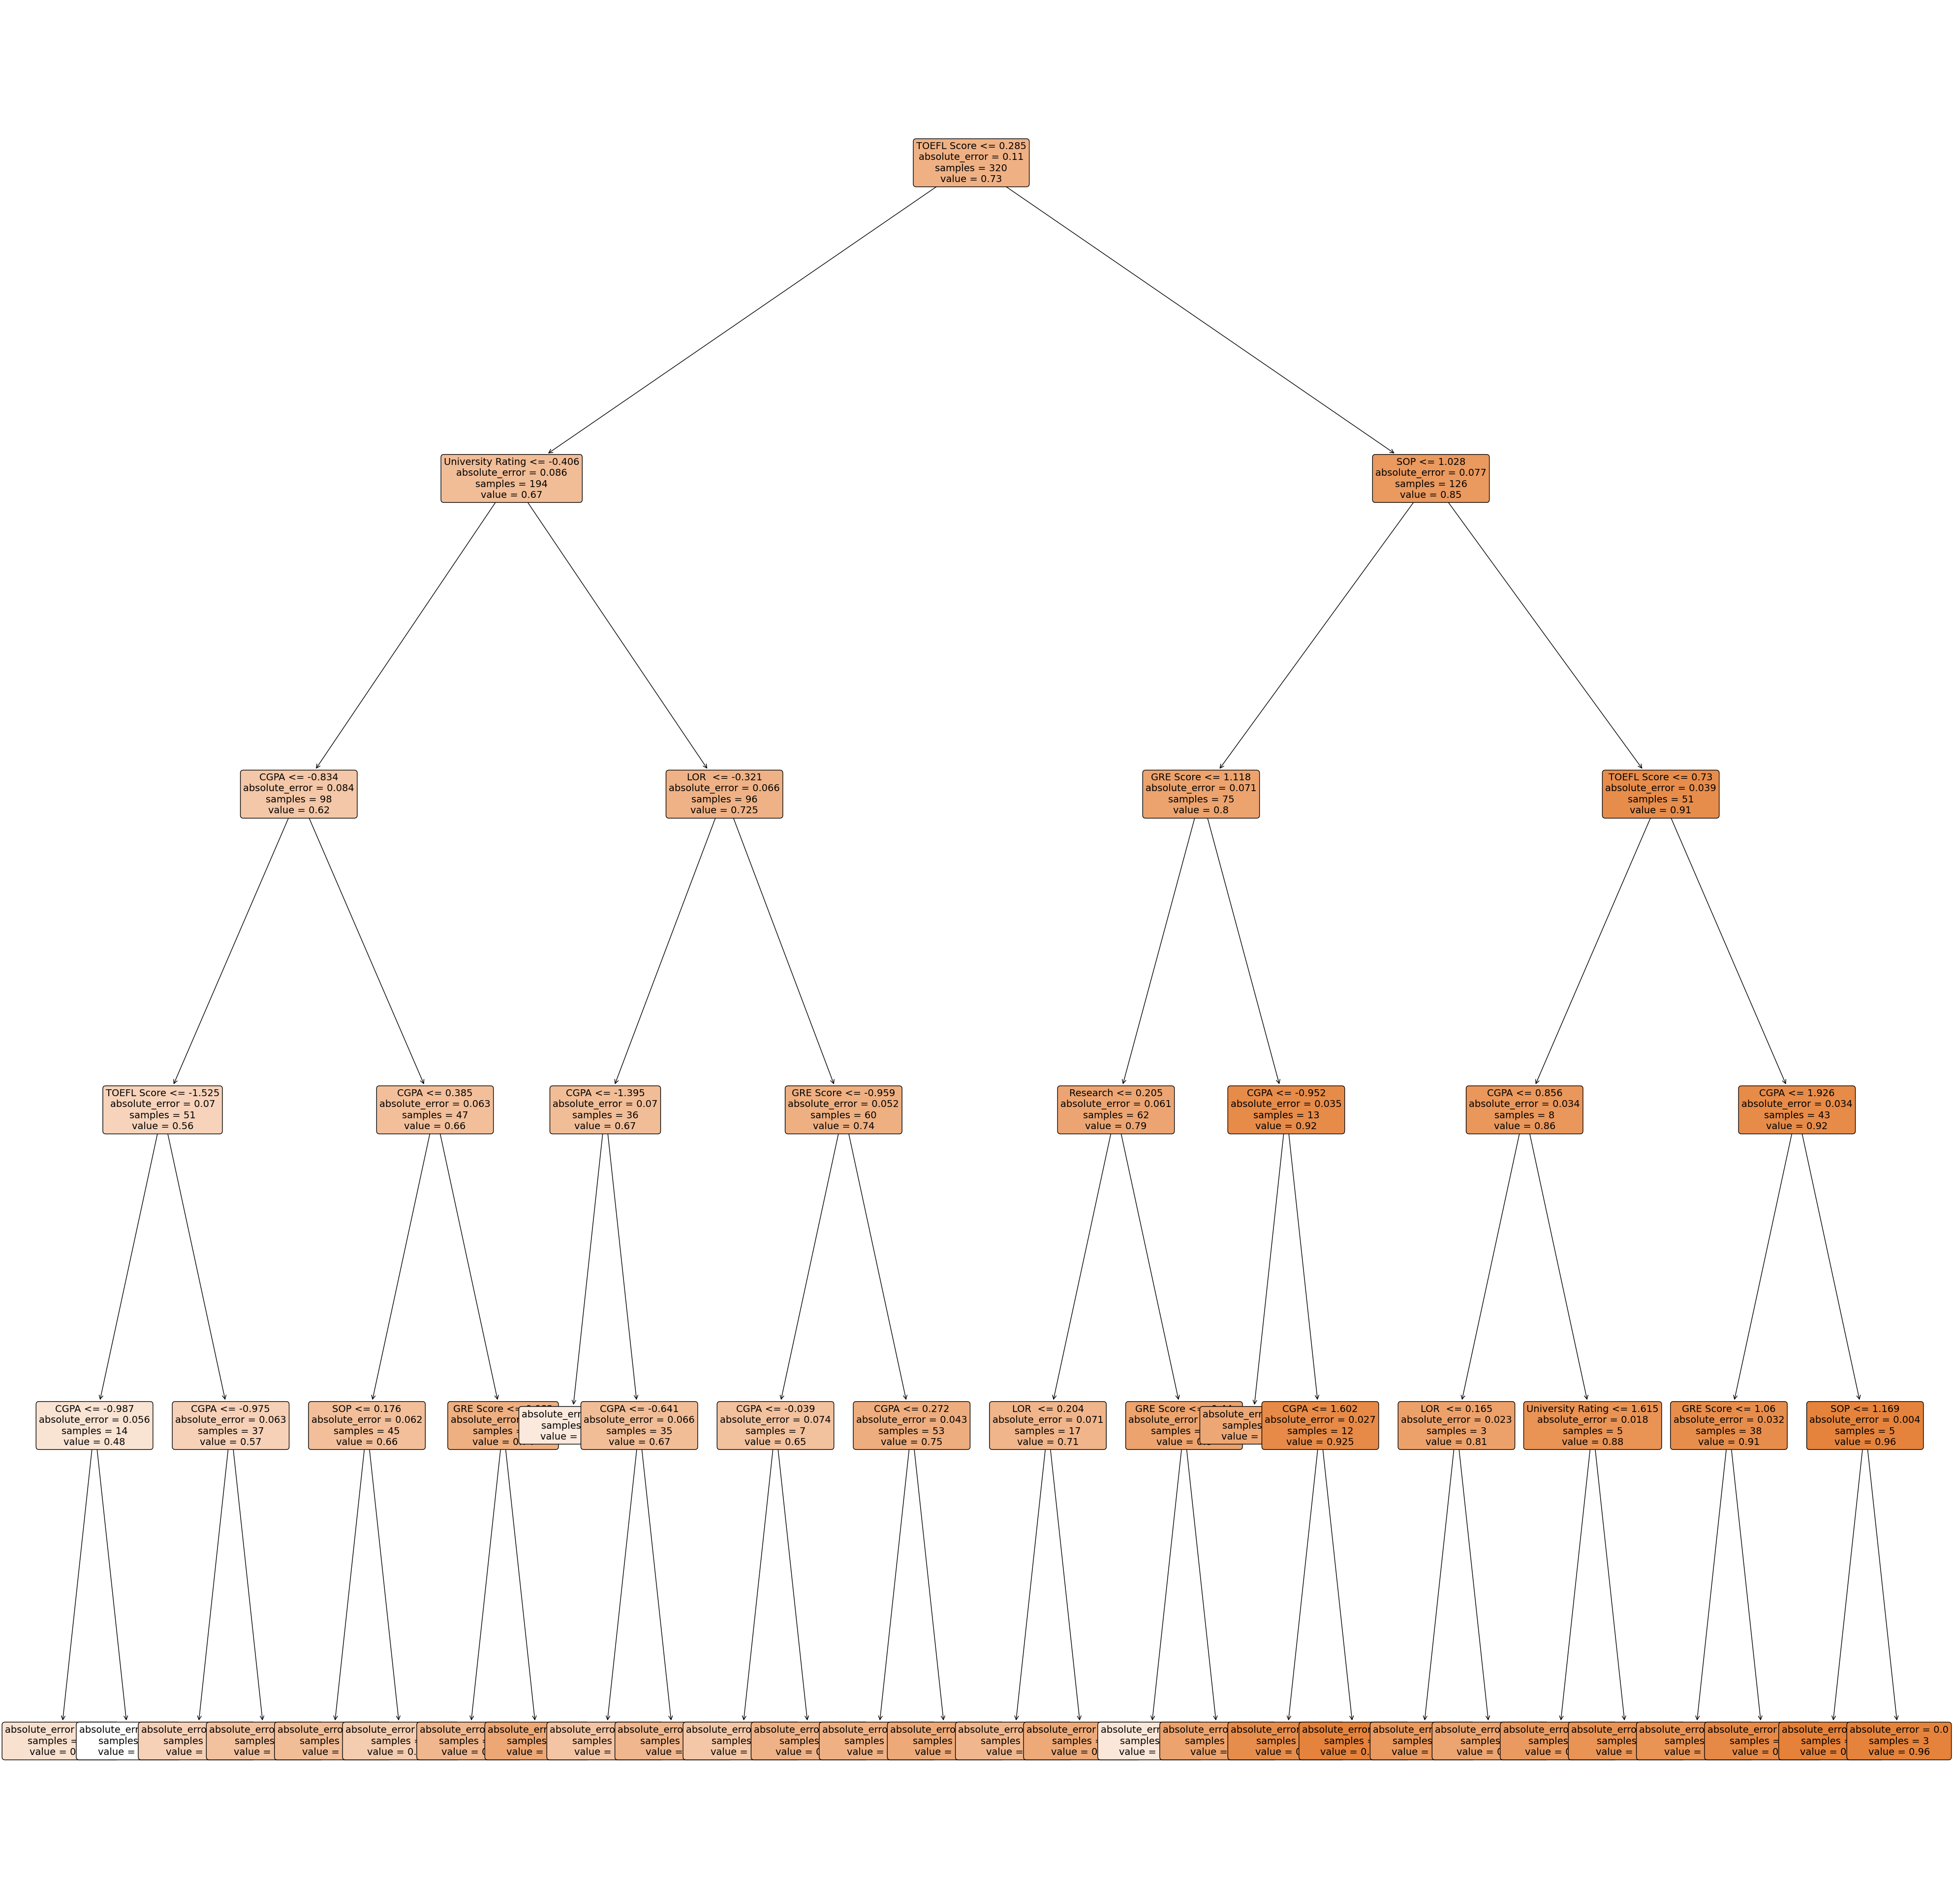

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(best_model,
              feature_names=X.columns, 
              class_names=y, 
              filled=True,
              rounded=True,
              fontsize=14)

In [191]:
from sklearn.ensemble import RandomForestRegressor

In [192]:
# Random Forest
Rf_model= RandomForestRegressor(n_estimators = 5, random_state = 10)

In [193]:
Rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=5, random_state=10)

In [194]:
# making predictions for training data
print("Predicting on train data...")
y_pred_training = model.predict(X_train_scaled)

# making predictions for test data
print("Predicting on test data...")
y_pred = model.predict(X_test_scaled)

Predicting on train data...
Predicting on test data...


In [195]:
# Evaluation metrics
r2_train = r2_score(y_train, y_pred_training)
print(f"✅ R² Score Train: {r2_train:.4f}")
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score Test: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

Evaluation_Results.iloc[2]['R2 Test']= r2 
Evaluation_Results.iloc[2]['R2 Adjusted']= adjusted_r2 
Evaluation_Results.iloc[2]['MAE']= mae 
Evaluation_Results.iloc[2]['MSE']= mse
Evaluation_Results.iloc[2]['RMSE']= rmse

✅ R² Score Train: 0.7952
✅ R² Score Test: 0.8212
✅ Adjusted R² Score: 0.8038
📉 Mean Squared Error (MSE): 0.0046
📉 Mean Absolute Error (MAE): 0.0480
📉 Root Mean Squared Error (RMSE): 0.0679


In [196]:
Evaluation_Results

,R2 Test,R2 Adjusted,MAE,MSE,RMSE
Multilinear Regression (MR),0.821208,0.803826,0.047957,0.004617,0.067949
Decision Tree (DT),0.821208,0.803826,0.047957,0.004617,0.067949
Random Forest (RF),0.821208,0.803826,0.047957,0.004617,0.067949


In [204]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=Rf_model,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best GridSearch Parameters:\n", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best GridSearch Parameters:
 {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


The data is not that big and I wanted anexhaustive search that is why used Gridsearch

Running Random forest again on hypertuned model

In [205]:
# Random Forest
Rf_model_tuned= RandomForestRegressor(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=300,
    random_state = 10
)

In [206]:
Rf_model_tuned.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=300,
                      random_state=10)

In [207]:
# making predictions for training data
print("Predicting on train data...")
y_pred_training = model.predict(X_train_scaled)

# making predictions for test data
print("Predicting on test data...")
y_pred = model.predict(X_test_scaled)

Predicting on train data...
Predicting on test data...


In [208]:
# Evaluation metrics
r2_train = r2_score(y_train, y_pred_training)
print(f"✅ R² Score Train: {r2_train:.4f}")
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score Test: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

✅ R² Score Train: 0.7952
✅ R² Score Test: 0.8212
✅ Adjusted R² Score: 0.8038
📉 Mean Squared Error (MSE): 0.0046
📉 Mean Absolute Error (MAE): 0.0480
📉 Root Mean Squared Error (RMSE): 0.0679


No change in values even after hypertuning

In [209]:
Evaluation_Results

,R2 Test,R2 Adjusted,MAE,MSE,RMSE
Multilinear Regression (MR),0.821208,0.803826,0.047957,0.004617,0.067949
Decision Tree (DT),0.821208,0.803826,0.047957,0.004617,0.067949
Random Forest (RF),0.821208,0.803826,0.047957,0.004617,0.067949


In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

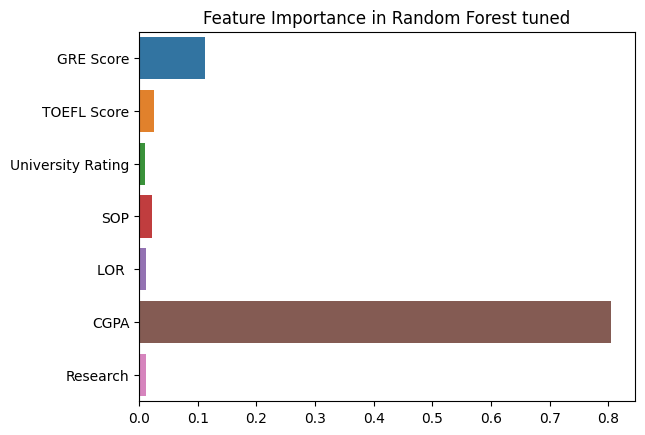

In [211]:
# Get feature importance scores
importances = Rf_model_tuned.feature_importances_
feature_names = X.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest tuned")
plt.show()

In [212]:
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

In [213]:
top_5_features = feature_importance_df['feature'].head(5).tolist()
print("Top 5 Features:", top_5_features)

Top 5 Features: ['CGPA', 'GRE Score', 'TOEFL Score', 'SOP', 'LOR ']


In [214]:
X_top5 = X[top_5_features]

In [215]:
X_train_top5, X_test_top5, y_train, y_test = train_test_split(X_top5, y, test_size=0.2, random_state=42)

In [216]:
Rf_model_top5 = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    bootstrap=True,
    random_state=42
)

In [217]:
Rf_model_top5.fit(X_train_top5, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=300,
                      random_state=42)

In [218]:
y_pred = Rf_model_top5.predict(X_test_top5)

In [219]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ R² Score Test: {r2:.4f}")
print(f"✅ Adjusted R² Score: {adjusted_r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")

✅ R² Score Test: 0.8053
✅ Adjusted R² Score: 0.7864
📉 Mean Squared Error (MSE): 0.0050
📉 Mean Absolute Error (MAE): 0.0490
📉 Root Mean Squared Error (RMSE): 0.0709


We saw that R2 score decreased when features were removed. 